# EDA on US Visa data for US Visa Prediction Project 

#### Machine Learning Life Cycle:

- Understanding of the Problem Statement / Business Use case
- Data Collection
- Exploratory Data Analysis
- Data Cleaning
- Data Pre-processing
- Model Training
- Model Selection (best performance)

# About

#### The Immigration and Nationality Act(INA) of the US permit foreign workers to come to the United State to work on either a temporary or permanent basis.The act also protects US workers against adverse impacts on working place and maintain requirements when they hire foreign workers to fill workforce shortages.The Immigration programs are administreted by the Office of Foreign Labour Certification (OFLC).


#### 1) Problem statement.
- OFLC gives job certification applications for employers seeking to bring foreign workers into the United States and grants certifications.

- As In last year the count of employees were huge so OFLC needs Machine learning models to shortlist visa applicants based on their previous data.

**In this project we are going to use the given data to build a Classification model:**

- This model will check if Visa get approved or not based on the given dataset.
- This can be used to Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the certain criteria which influences the decision.

#### 2) Data Collection

- The Dataset is part of the Office of Foreign Labor Certification(OFLC)
- The Dataset contains 25480 records and 12 number of features.

reference:
```python
https://www.kaggle.com/datasets/moro23/easyvisa-dataset
```

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("EasyVisa.csv")
df.shape

(25480, 12)

2.1 Import Data and Required Packages
- pandas
- numpy
- matplotlib.pyplot
- seaborn
- plotly.express
- warnings

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
df = pd.read_csv("EasyVisa.csv")
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [5]:
df.shape

(25480, 12)

##### Summary of the dataset
**This only provide statstical info about numerical features**

In [6]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


#### Check Datatypes in the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


#### 3. Exploring Data

In [8]:
numerical_columns = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_columns =[feature for feature in df.columns if df[feature].dtype == 'O']

print(f"""Number of Numerical columns : {len(numerical_columns)} and Numerical columns names:{numerical_columns}\n
Number of Categorical columns : {len(categorical_columns)} and Categorical columns names:{categorical_columns}""")

Number of Numerical columns : 3 and Numerical columns names:['no_of_employees', 'yr_of_estab', 'prevailing_wage']

Number of Categorical columns : 9 and Categorical columns names:['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [9]:
for col in categorical_columns:
    print(df[col].value_counts(normalize=True)*100)
    print("---"*50)

case_id
EZYV01       0.003925
EZYV02       0.003925
EZYV03       0.003925
EZYV04       0.003925
EZYV05       0.003925
               ...   
EZYV25476    0.003925
EZYV25477    0.003925
EZYV25478    0.003925
EZYV25479    0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
------------------------------------------------------------------------------------------------------------------------------------------------------
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
------------------------------------------------------------------------------------------------------------------------------------------------------
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
----------------------------------------

Insights :
- case_id has unique number which shows that each candidate applied are individuals but this will not help use for now.
- continent columns has majority of candidates from asia which is 66% hence it overlay analysis only on asia so we can transform the minor categories of continent to one category to overcome biasness.
- unit_of_wage columns has majority of yearly contracts with 90% as it most important feature.

#### Univariate Analysis:
- The term univariate analysis refers to the analysis of **uni** means one variable.The purpose of univariate analysis is to understand the distribution of single column.


Other Types of Analysis are:
- Bivariate Analysis : two variable Analysis 
- Multi-variate Analysis : More than two variable Analysis
 

#### Numerical Features

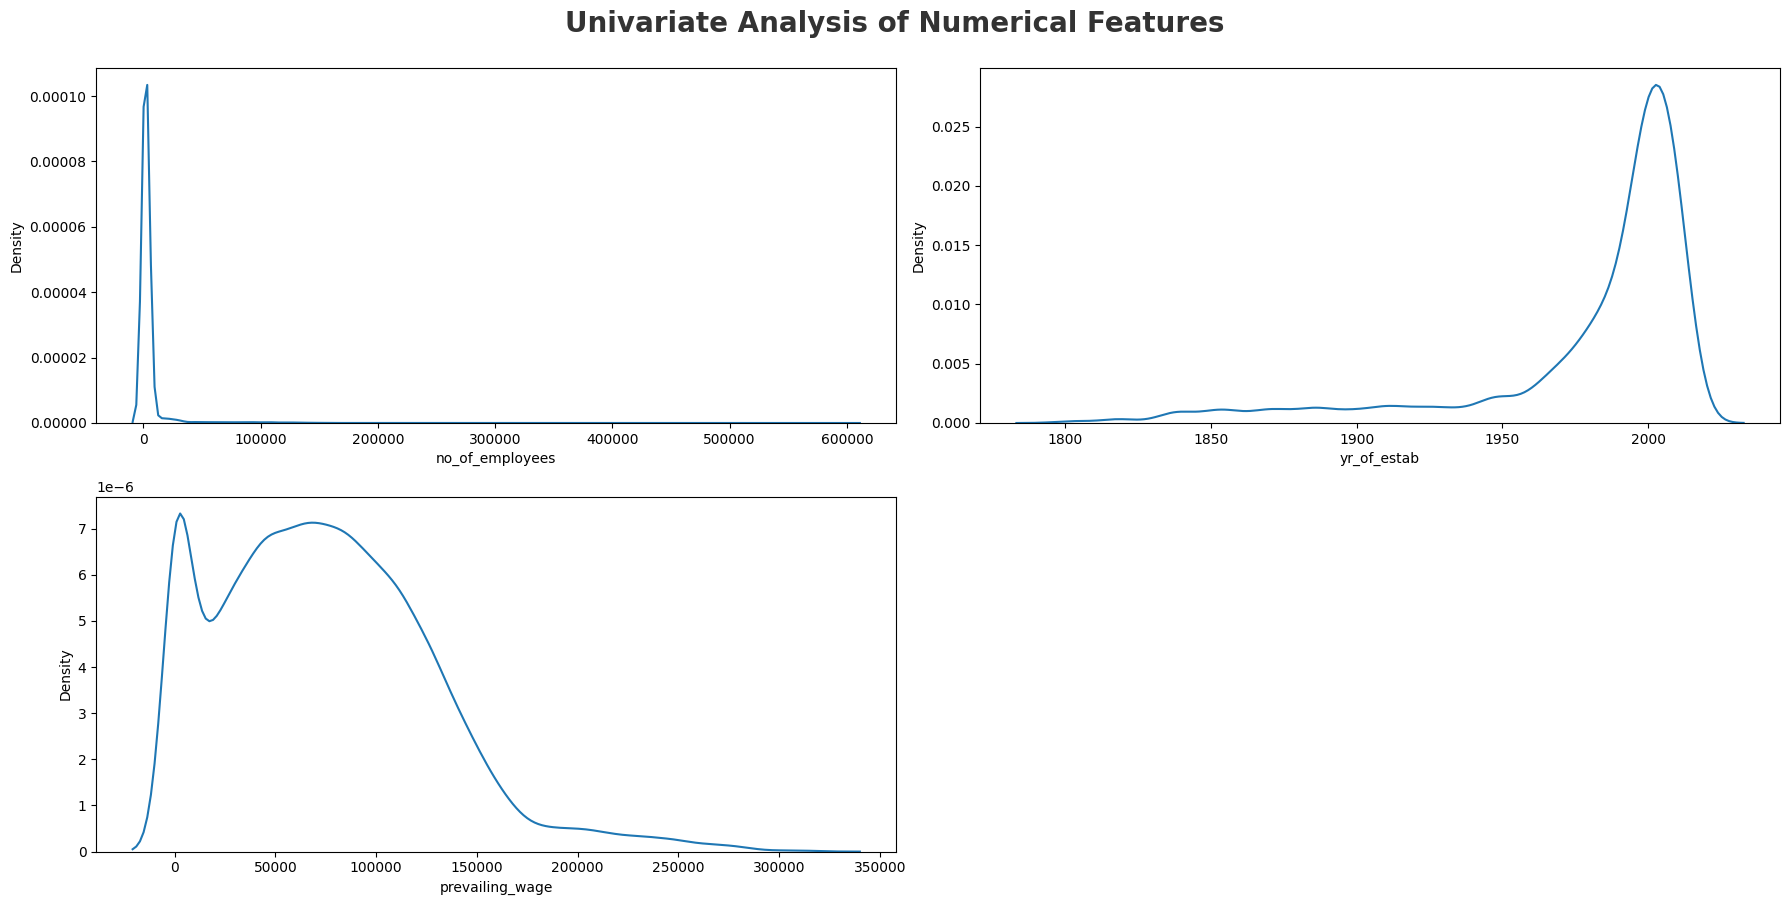

In [10]:
plt.figure(figsize=(18,9))
plt.suptitle('Univariate Analysis of Numerical Features',fontsize=20,fontweight='bold',y=1.0,alpha=0.8)

for index,columns in enumerate(numerical_columns):
    plt.subplot(2,2,index+1)
    sns.kdeplot(x=df[numerical_columns[index]])
    plt.xlabel(numerical_columns[index])
    plt.tight_layout()
plt.show()

#### Insights:

**no_of_empolyees**:
- As we can see in the no of employees variable the distribution is conecentrated at left side which shows that probability of occurness of number of empolyee is range of below 0 to above and between or less than 50000 but the shiftness and empty reigion at right side shows that there are number of employees which are high in numbers of employees shows high possibility of outliers surely contains outilers.**right skewedness**

**yr_of_estab**:
- In the yr_of_estab variable shows that initial years as probability of occurs of empolyees are less till 1950 whereas after 1950 it shows high probability of empolyees to occur . The moderate peakness and long tail towards left shows spreadness also we can look at statistical measure where mean , median and  mode.**left skewedness**

**prevailing_wage**:
- Now here the distribution of curve shows **two peakness** where as first peak shows that min wage empolyees are high which means high probability of occurs between 0 and 30000 here the spread is less and above 30000 to 180000 wage has high spread shows more number of empolyees around this range and after 1800000 shows high wage earnings means there are fewer earnings.Here this is distribution curve shows bimodal distribution and yes outlier might be there.**right skewed distribution**. 

In [11]:
categorical_columns

['case_id',
 'continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

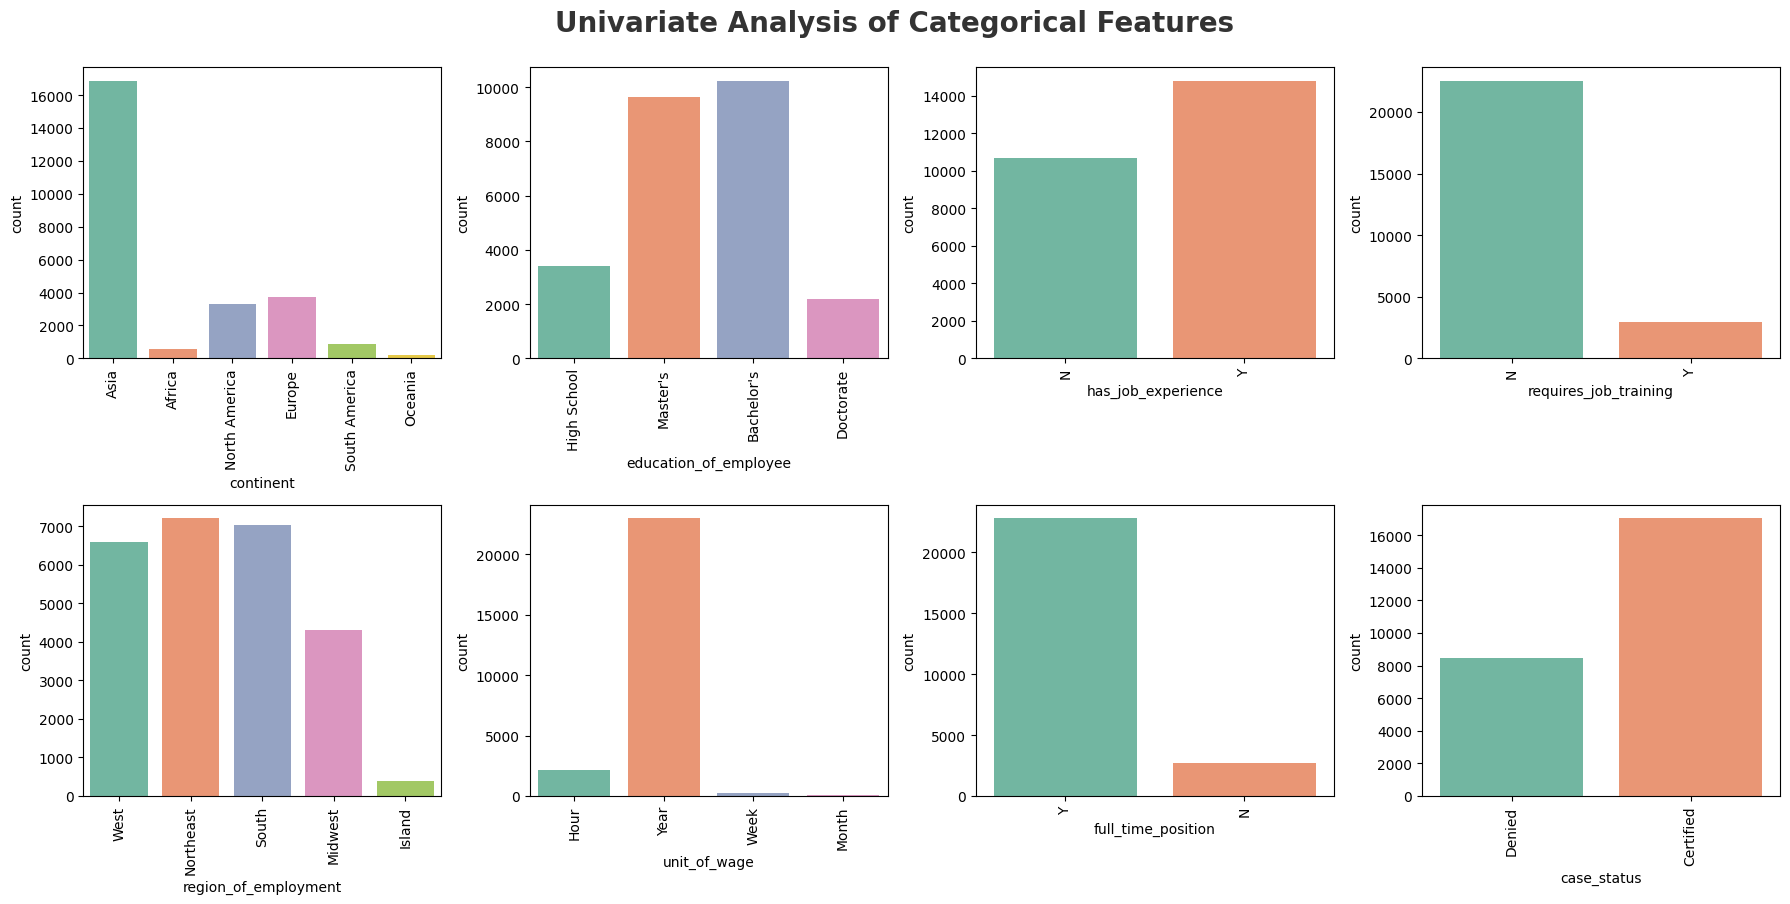

In [12]:
categorical_columns.remove('case_id') # uncomment when first time run
plt.figure(figsize=(18,9))
plt.suptitle('Univariate Analysis of Categorical Features',fontsize=20,fontweight='bold',y=1.0,alpha=0.8)

for index,columns in enumerate(categorical_columns):
    plt.subplot(2,4,index+1)
    sns.countplot(x=df[categorical_columns[index]],palette='Set2')
    plt.xlabel(categorical_columns[index])
    plt.xticks(rotation=90)
    plt.tight_layout()
plt.show()

#### Insights:

##### Two number of categorical labeled data:
- job experience column shows that the **high number of Yes** than No.
- requires job training column shows that the majority of empolyees are **not required training** labeled as **No** and low number of empolyees labeled as **Yes**.
- full time position column shows that **majority of empolyee doing full time** labeled as **Y** wheras less number of empolyee labeled as **N**.
- case status column has **majority of empolyee certifited** for job and **less number of empolyees denied** for application. 


##### More than two variable categorical labeled data:
- continent column shows that the asia,europe and north america contient empolyees are high in numbers
- education of employee column shows that bachelor's,master's and high school has high number of employee.
- region of employment column shows that northest,south and west region shows has high number of empolyee.
- unit of wage column shows that year,hour has high number of contracts.


#### Multivariate Analysis:

- More than two variable we use multivariate analysis

**here we will take threshold value to filter out only those columns for further analysis**

In [13]:
df[numerical_columns].nunique() # no discrete values in numerical columns

no_of_employees     7105
yr_of_estab          199
prevailing_wage    25454
dtype: int64

In [14]:
discrete_columns = [feature for feature in numerical_columns if df[feature].nunique() <= 25]
continuous_columns = [feature for feature in numerical_columns if df[feature].nunique() > 25]

print(f"discrete columns: {discrete_columns} and its number of columns are: {len(discrete_columns)}\ncontinuous columns: {continuous_columns} and its number of columns are: {len(continuous_columns)}")

discrete columns: [] and its number of columns are: 0
continuous columns: ['no_of_employees', 'yr_of_estab', 'prevailing_wage'] and its number of columns are: 3


##### Multicollinearity Analysis

- This analysis is used to know wheather one column is highly depended on another columns it is known as multicollinearity.What this tells wheather both columns do have same information or redudant or duplicated information.

#### Check Multicollinearity in Numerical Features

In [15]:
df[numerical_columns]

,no_of_employees,yr_of_estab,prevailing_wage
0,14513,2007,592.2029
1,2412,2002,83425.6500
2,44444,2008,122996.8600
3,98,1897,83434.0300
4,1082,2005,149907.3900
...,...,...,...
25475,2601,2008,77092.5700
25476,3274,2006,279174.7900
25477,1121,1910,146298.8500
25478,1918,1887,86154.7700


**Here we only have 3 columns which has numerical information in which the all of them are continuous variable and indepedent of each other it does not have redudant and duplicated records**

- No multicollinearity between any variable.

#### Multicollinearity on Categorical columns

Here we can not directly check multicollinearity on raw categorical columns we need to encode first.But we will not check by encoding but we will take assumption and test it.

- A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test

- A chi-square statistic is one way to show a relationship between two categorical variables.

- Here we test correlation of Categorical columns with Target column i.e case_status

1. Null Hypothesis(**H0**) : The Feature is independent of target column . (No Correlation)
2. Alternative Hypothesis(**H1**) : The Feature and Target column are not independent . (Correlation)

In [16]:
categorical_columns

['continent',
 'education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'region_of_employment',
 'unit_of_wage',
 'full_time_position',
 'case_status']

In [17]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(df['requires_job_training'],df['case_status']))[1]

np.float64(0.18556470819406778)

In [18]:
from scipy.stats import chi2_contingency

chi2_test = []
for feature in categorical_columns:
    if chi2_contingency(pd.crosstab(df['case_status'], df[feature]))[1] < 0.05:
        chi2_test.append("Reject Null Hypothesis")
    else:
        chi2_test.append("Fail to Reject Null Hypothesis")
result = pd.DataFrame(data=[categorical_columns,chi2_test]).T
result.columns = ['Column','Hypothesis result']
result

,Column,Hypothesis result
0,continent,Reject Null Hypothesis
1,education_of_employee,Reject Null Hypothesis
2,has_job_experience,Reject Null Hypothesis
3,requires_job_training,Fail to Reject Null Hypothesis
4,region_of_employment,Reject Null Hypothesis
5,unit_of_wage,Reject Null Hypothesis
6,full_time_position,Reject Null Hypothesis
7,case_status,Reject Null Hypothesis


#### Report:
- Here require_job_training fails to reject null hypothesis which means it doesnot correlate with target variable.

#### Null values 

In [19]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

- It doesnot contain any Null values 

In [20]:
continuous_columns

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

In [21]:
continues_features = [feature for feature in numerical_columns if len(df[feature].unique()) > 10]
print("Num of continuous features :", continues_features)

Num of continuous features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


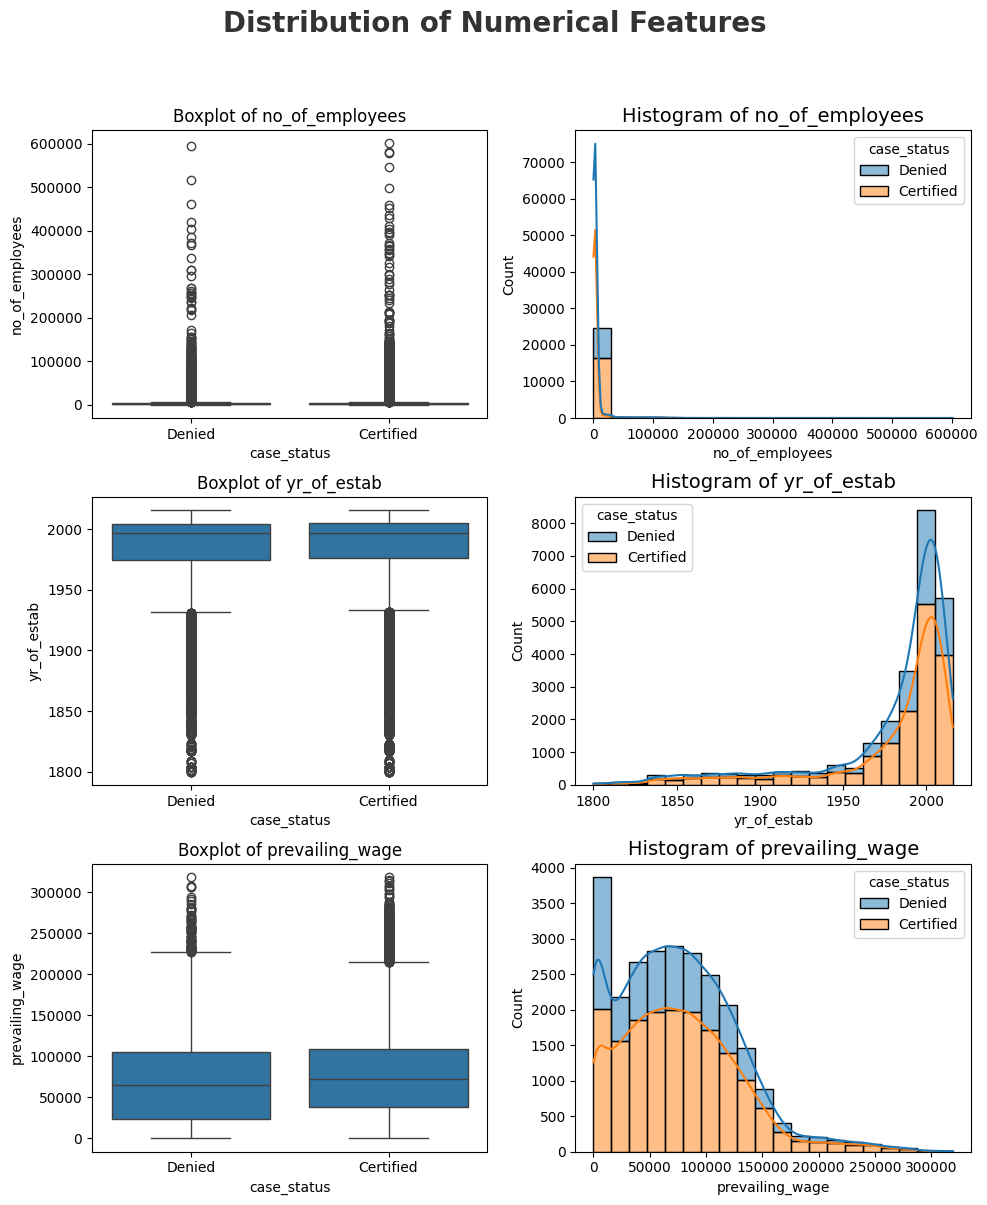

In [22]:
fig,ax = plt.subplots(3,2,figsize=(10,12))
fig.suptitle('Distribution of Numerical Features',fontsize=20,fontweight='bold',y=1.0,alpha=0.8)
for i,columns in enumerate(continues_features):
    sns.boxplot(data=df,x='case_status',y=columns,ax=ax[i,0])
    ax[i,0].set_title(f"Boxplot of {columns}",fontsize=12)
    sns.histplot(data=df,x=columns,hue='case_status',bins=20,kde=True,multiple='stack',ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {columns}',fontsize=14)

fig.tight_layout()
fig.subplots_adjust(top=0.9)
fig.show()

In [23]:
df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

##### Initial Analysis Report

- no of empolyees contains many outlier that must be handled figure out wheather it make sense.And also it's a right skewed which concentrated toward left due to skeweness.
- yr of estab also contain outlier in earlier years which is shown in lower bond.Also we can see it is left skewed as we can correlate with boxplot.
- prevailing wage look at distribution of it spread and pikes whereas it also have skeweness towards right side and it contains outliers in upper bond of boxplot which has outlier in those high wages also correlate with distribution.
- There is no missing values into the dataset.
- The case_id column doesnot tell us any useful information so remove it while model training.
- The case_status is the target column.
- It contains only 3 numerical columns which are continuous variable.
- Whereas numerical columns doesnot have multicollinearity.
- Majority of columns in dataset is categorical columns it contains 3 types of categorical variables first is binary labeled variable and second one is multiclass variables which contains more than 2 class label.
- Feature encoding can be performed on these categorical columns.
- In categorical columns there are binary , nominal and ordinal variables <br>
- binary labeled Variables:
    - has_job_experience
    - full_time_position
    - requires_job_training
    - case_status
- Nominal Variables:
    - continent
    - region of employee.
- Ordinal variables:
    - education_of_employee
    - unit_of_wage

#### 4. Visualization

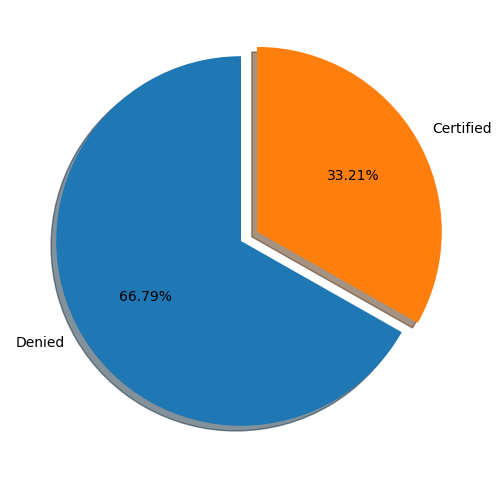

In [24]:
case_status_perecent = df['case_status'].value_counts(normalize=True)*100
labels = df.case_status.unique()

fig,ax = plt.subplots(figsize=(12,6))
explode = (0,0.1)
ax.pie(case_status_perecent,labels=labels,startangle=90,autopct='%1.2f%%',explode=explode,shadow=True)
plt.show()

**Here we can the distribution between ceritifed and denied employees which is 33.21% for ceritifed and 66.79% for denied<br> so distrubution is uneven denied are more occured whereas certified is less occurence this shows imbalance so we say it as imbalanced data in target column this column is very important for model development**

**here why it is very important lets say we train the model on this misclassed data column which indirectly biases the model towards making majority of employee which has all factors to be ceritifed will be misclassed or false positive and results into bad prediction so we had to balance target column**
  

#### 4.2 Does applicant Continent has any impact on Visa Status?

In [48]:
applicant_continent_df = (df.groupby('continent')['case_status'].value_counts()).reset_index()
applicant_continent_df

,continent,case_status,count
0,Africa,Certified,397
1,Africa,Denied,154
2,Asia,Certified,11012
3,Asia,Denied,5849
4,Europe,Certified,2957
5,Europe,Denied,775
6,North America,Certified,2037
7,North America,Denied,1255
8,Oceania,Certified,122
9,Oceania,Denied,70


In [26]:
applicant_continent_df[applicant_continent_df['case_status']=='Certified']

,continent,case_status,count
0,Africa,Certified,397
2,Asia,Certified,11012
4,Europe,Certified,2957
6,North America,Certified,2037
8,Oceania,Certified,122
10,South America,Certified,493


In [27]:
applicant_continent_df[applicant_continent_df['case_status']=='Denied']

,continent,case_status,count
1,Africa,Denied,154
3,Asia,Denied,5849
5,Europe,Denied,775
7,North America,Denied,1255
9,Oceania,Denied,70
11,South America,Denied,359


**Here case status shows that all of the employees irrespective of continent has more than 50% certified and columns which are classified as denied shows that all employess has less than 50%**

In [29]:
'''
percent_of_all_continent_certified = round(applicant_continent_df[applicant_continent_df['case_status']=='Certified']['proportion'].sum(),2)/applicant_continent_df['proportion'].sum()*100
print(f"Percent of all continent employee which are certified is : {percent_of_all_continent_certified:.2f}%")'''

'\npercent_of_all_continent_certified = round(applicant_continent_df[applicant_continent_df[\'case_status\']==\'Certified\'][\'proportion\'].sum(),2)/applicant_continent_df[\'proportion\'].sum()*100\nprint(f"Percent of all continent employee which are certified is : {percent_of_all_continent_certified:.2f}%")'

In [30]:
'''print(f"Remaining continent employee which are denied for employment in percentage is {100 - percent_of_all_continent_certified:.2f}%")'''

'print(f"Remaining continent employee which are denied for employment in percentage is {100 - percent_of_all_continent_certified:.2f}%")'

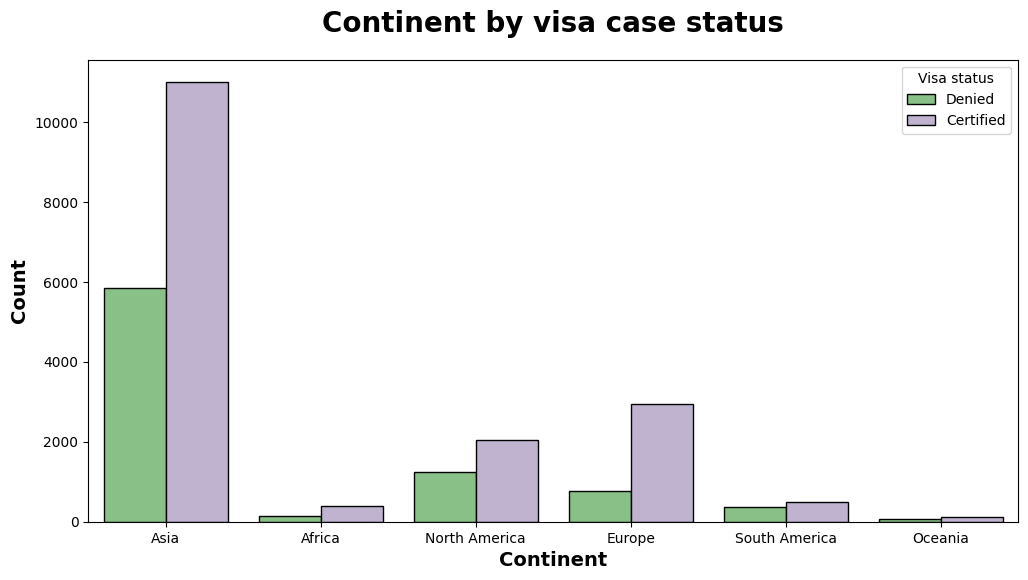

In [31]:
plt.subplots(figsize=(12,6))
sns.countplot(data=df,x='continent',hue='case_status',palette='Accent',ec='black')
plt.title('Continent by visa case status',fontsize=20,pad=20,weight='bold')
plt.ylabel('Count',weight='bold',fontsize=14)
plt.xlabel('Continent',weight='bold',fontsize=14)
plt.legend(title='Visa status',fancybox=True)
plt.show()

In [32]:
df2 = df.copy()

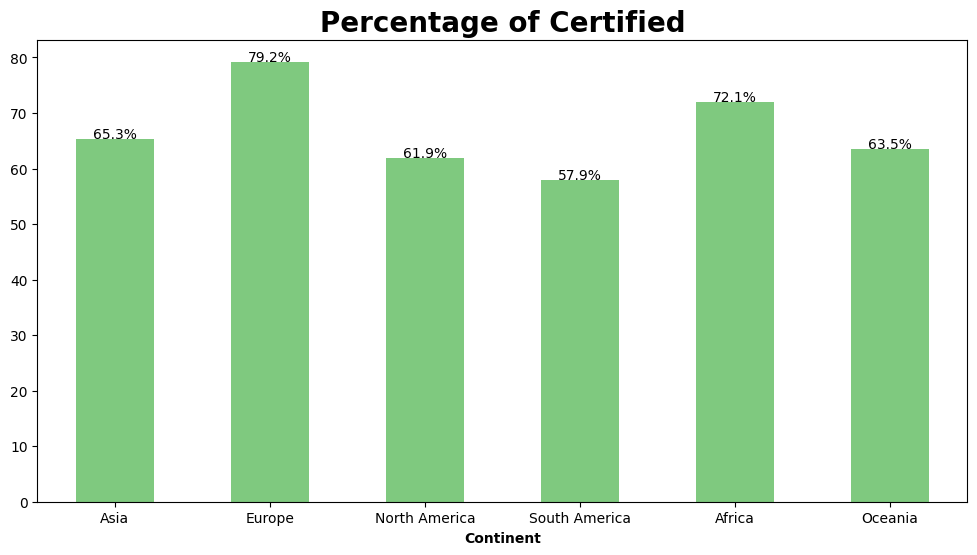

In [33]:
plt.figure(figsize=(12,6))
(100*df2[df2['case_status'].isin(['Certified'])]['continent'].value_counts()/df2['continent'].value_counts()).plot(kind='bar',stacked=True,colormap='Accent')
plt.title('Percentage of Certified',fontsize=20,fontweight='bold')
order1 = (100*df2[df2['case_status'].isin(['Certified'])]['continent'].value_counts()/df2['continent'].value_counts())
for i in range(order1.shape[0]):
    count = order1[i]
    strt = '{:0.1f}%'.format(count)
    plt.text(i,count+0.1,strt,ha='center')

plt.xlabel('Continent',fontweight='bold')
plt.xticks(rotation=0)
plt.show()

In [45]:
df['continent'].value_counts(normalize=True) * 100

continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64

#### Report:
- Asia has the highest number of applicants, contributing ~65% of all Certified applications.
- Asia accounts for approximately 61.5% of all Certified applications.
- Europe follows with ~17% of Certified applications, despite fewer total applicants.
- The highest chance of certification is for applicants from Europe (~79%), followed by Africa (~72%).
- While Asia leads in volume, Europe leads in success rate.

#### 4.3 Does applicant education has any impact on Visa Status?

In [34]:
df2.groupby('education_of_employee')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
education_of_employee case_status            
Bachelor's            Certified     62.214188
                      Denied        37.785812
Doctorate             Certified     87.226277
                      Denied        12.773723
High School           Denied        65.964912
                      Certified     34.035088
Master's              Certified     78.627777
                      Denied        21.372223

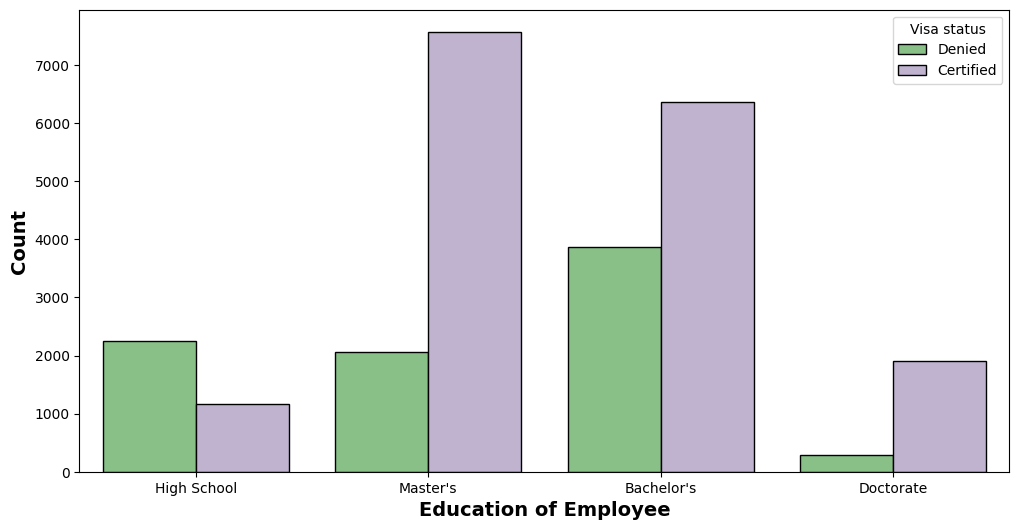

In [35]:
plt.subplots(figsize=(12,6))
sns.countplot(data=df,x='education_of_employee',hue='case_status',palette='Accent',ec='black')
plt.ylabel('Count',weight='bold',fontsize=14)
plt.xlabel('Education of Employee',weight='bold',fontsize=14)
plt.legend(title='Visa status',fancybox=True)
plt.show()

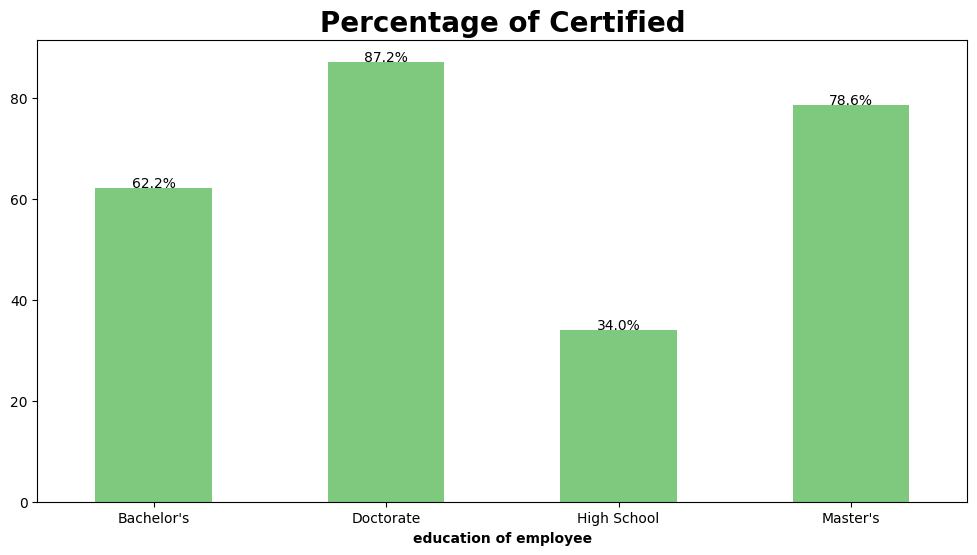

In [36]:
plt.figure(figsize=(12,6))
(100*df2[df2['case_status'].isin(['Certified'])]['education_of_employee'].value_counts()/df2['education_of_employee'].value_counts()).plot(kind='bar',stacked=True,colormap='Accent')
plt.title('Percentage of Certified',fontsize=20,fontweight='bold')
order1 = (100*df2[df2['case_status'].isin(['Certified'])]['education_of_employee'].value_counts()/df2['education_of_employee'].value_counts())
for i in range(order1.shape[0]):
    count = order1[i]
    strt = '{:0.1f}%'.format(count)
    plt.text(i,count+0.1,strt,ha='center')

plt.xlabel('education of employee',fontweight='bold')
plt.xticks(rotation=0)
plt.show()

#### Insights:
- education status has high impact
- Doctorate and Master's garduates have higher chanaces of accepted than others.

#### 4.4 Does applicant's previous work experience has any impact on Visa Status?

In [37]:
df2.groupby('has_job_experience')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
has_job_experience case_status            
N                  Certified     56.134108
                   Denied        43.865892
Y                  Certified     74.476422
                   Denied        25.523578

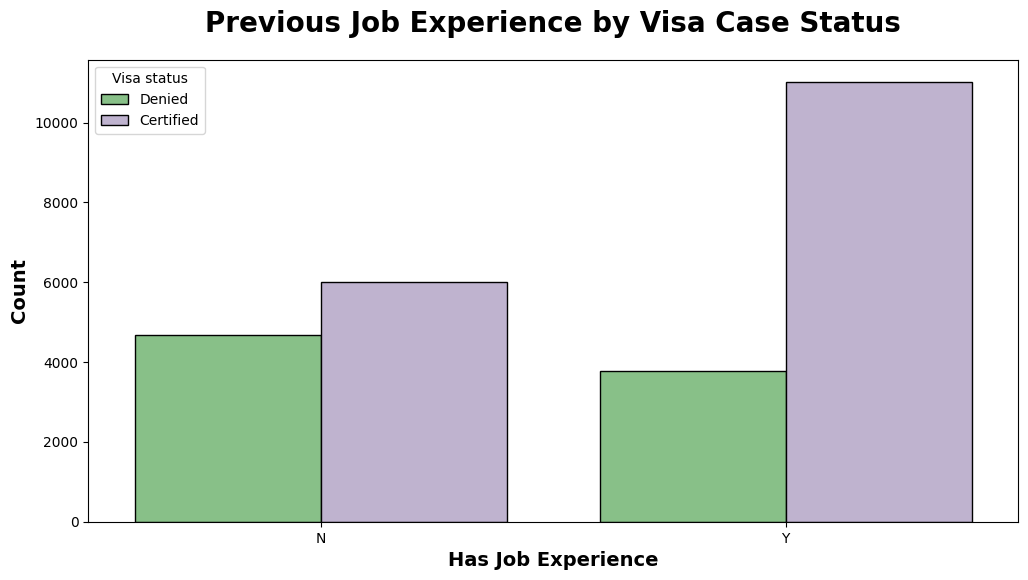

In [38]:
plt.subplots(figsize=(12,6))
sns.countplot(data=df2,x='has_job_experience',hue='case_status',palette='Accent',ec='black')
plt.title('Previous Job Experience by Visa Case Status',fontsize=20,pad=20,weight='bold')
plt.ylabel('Count',weight='bold',fontsize=14)
plt.xlabel('Has Job Experience',weight='bold',fontsize=14)
plt.legend(title='Visa status',fancybox=True)
plt.show()

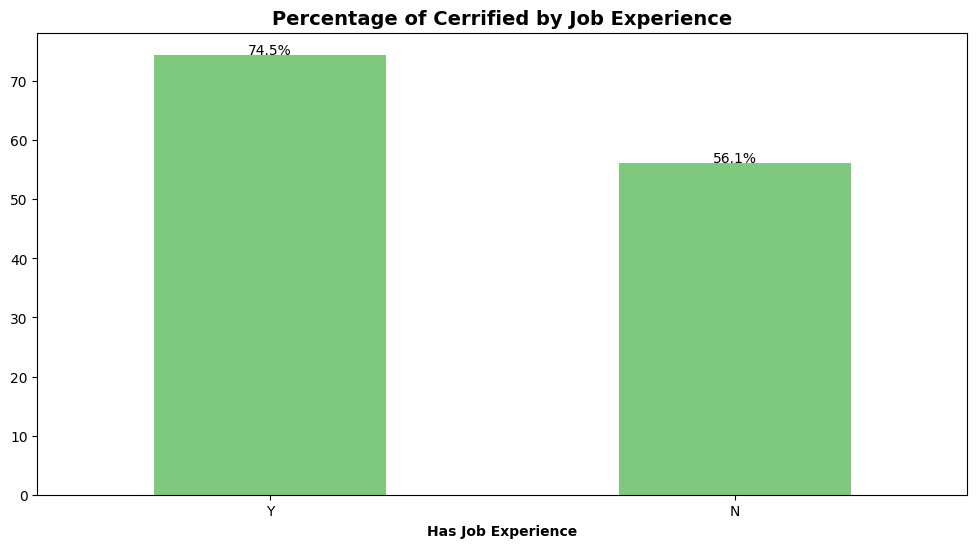

In [39]:
plt.figure(figsize=(12,6))

(100*df2[df['case_status'].isin(['Certified'])]['has_job_experience'].value_counts()/df2['has_job_experience'].value_counts()).plot(kind='bar',stacked=True,colormap='Accent')
plt.title("Percentage of Cerrified by Job Experience",fontsize=14,fontweight='bold')
order = (100*df2[df2['case_status'].isin(['Certified'])]['has_job_experience'].value_counts()/df2['has_job_experience'].value_counts())
for i in range(order.shape[0]):
    count = order[i]
    strt = '{:0.1f}%'.format(count)
    plt.text(i,count+0.1,strt,ha='center')

plt.xlabel('Has Job Experience',fontweight='bold')
plt.xticks(rotation=0)
plt.show()

In [44]:
df['has_job_experience'].value_counts(normalize=True) * 100

has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64

#### Report:
- Employee with previous work experience has been certitifed 74.5% only 25.5% applicant has been denied.
- 58% of employee has previous job experience and 42% doesnot has job experience.
- People with No previous work experience has been certified 56% and denied 43.8%.
- This means work experience has effect on visa status.
- There is a slight edge for the people work experience then the fresher as it makes sense.But the difference is not huge.

#### 4.5 If the Employee requires job training, does it impact on the visa status?

In [40]:
df2.groupby('requires_job_training')['case_status'].value_counts(normalize=True).to_frame()*100

proportion
requires_job_training case_status            
N                     Certified     66.645949
                      Denied        33.354051
Y                     Certified     67.884941
                      Denied        32.115059

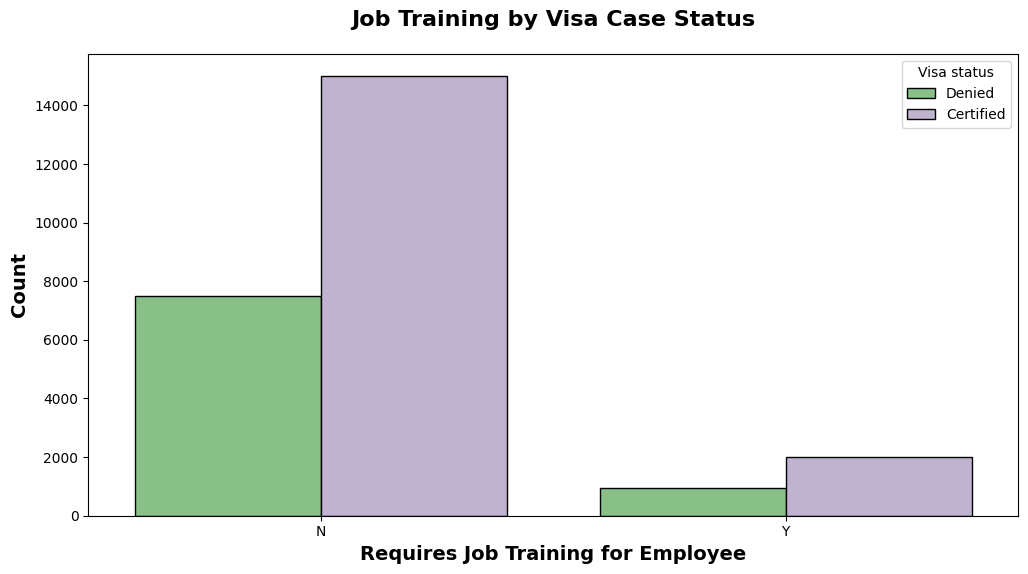

In [41]:
plt.subplots(figsize=(12,6))
sns.countplot(data=df2,x='requires_job_training',hue='case_status',palette='Accent',ec='black')
plt.title('Job Training by Visa Case Status',fontsize=16,pad=20,weight='bold')
plt.ylabel('Count',weight='bold',fontsize=14)
plt.xlabel('Requires Job Training for Employee',weight='bold',fontsize=14)
plt.legend(title='Visa status',fancybox=True)
plt.show()

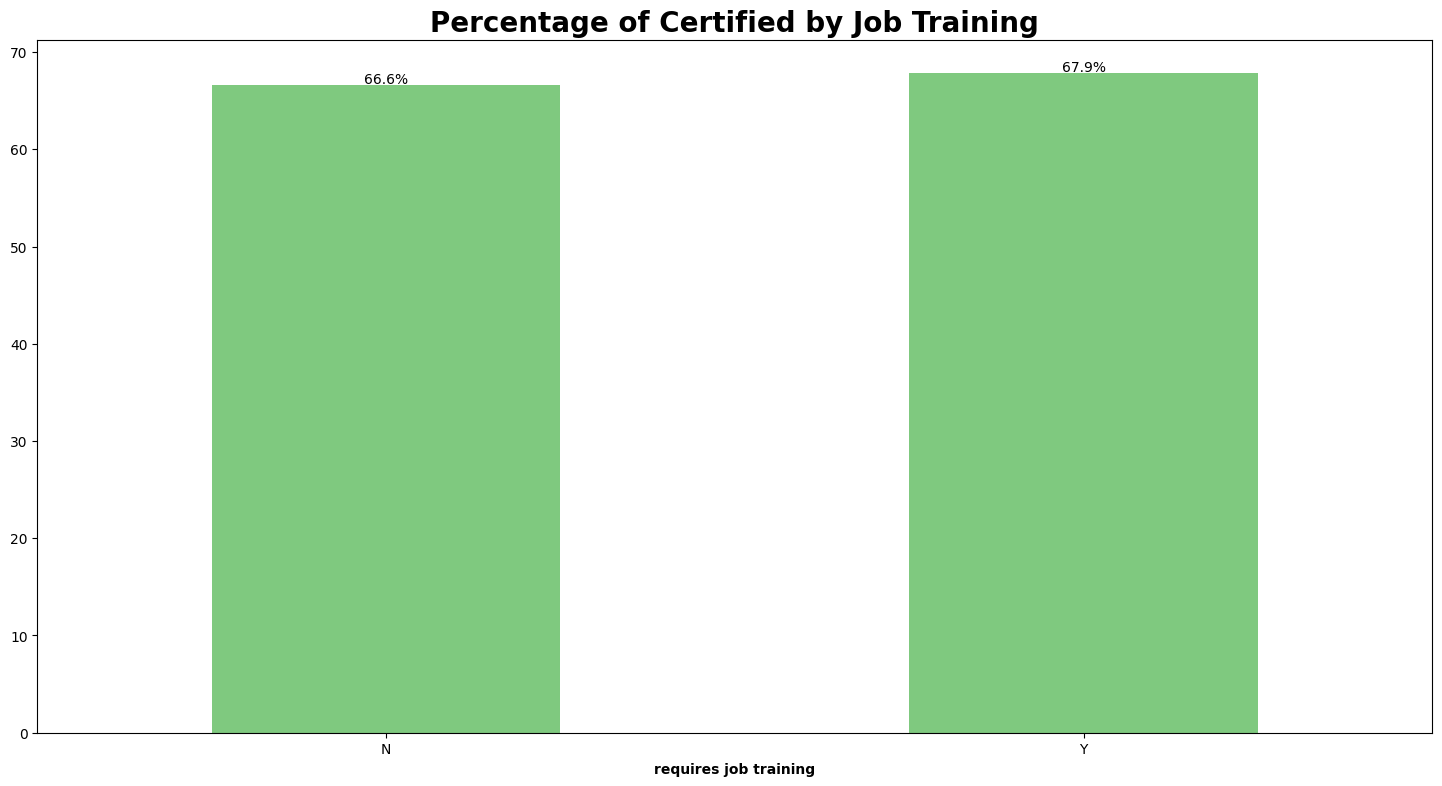

In [42]:
plt.figure(figsize=(18,9))
(100*df2[df2['case_status'].isin(['Certified'])]['requires_job_training'].value_counts()/df2['requires_job_training'].value_counts()).plot(kind='bar',stacked=True,colormap='Accent')
plt.title('Percentage of Certified by Job Training',fontsize=20,fontweight='bold')
order = (100*df2[df2['case_status'].isin(['Certified'])]['requires_job_training'].value_counts()/df2['requires_job_training'].value_counts())
for i in range(order.shape[0]):
    count = order[i]
    strt = '{:0.1f}%'.format(count)
    plt.text(i,count+0.1,strt,ha='center')

plt.xlabel('requires job training',fontweight='bold')
plt.xticks(rotation=0)
plt.show()

In [43]:
df['requires_job_training'].value_counts(normalize=True) * 100

requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64

#### Report:
- If employee requires job training and it doesnot have any effect on Visa status.
- 88.4% of employee who doesnot require job training.
- 11.5% of employee who require job training.
- 66.6% of employee who doesnot want job training got certified.
- 67.8% of employee who requires job training got certified.
- As per the hypothesis we tested for categorical varibales the requires job training doesnot have any impact on target variable.

#### 4.6 Does Number of employees of employeer has any impact on Visa status?

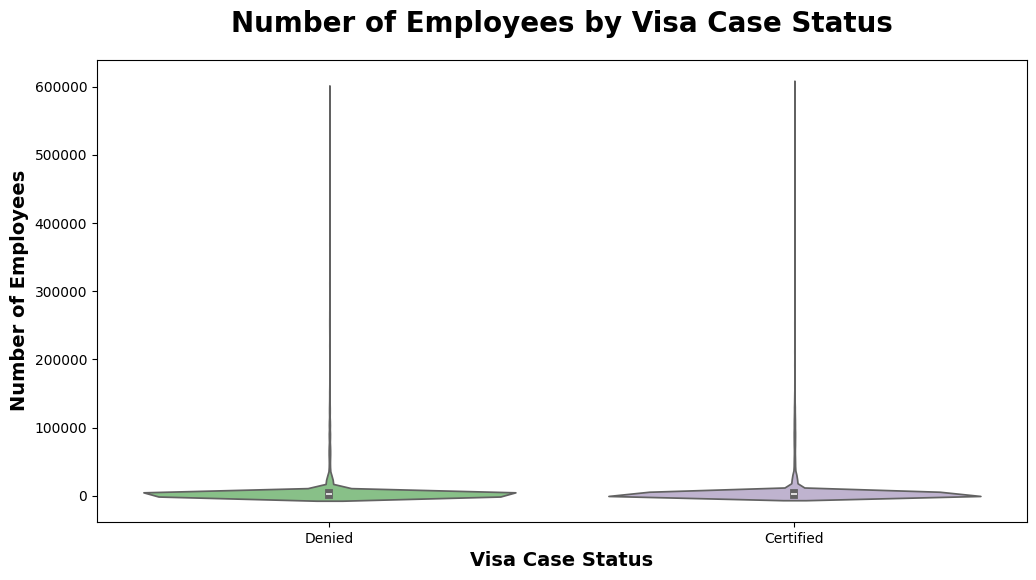

In [50]:
plt.subplots(figsize=(12,6))
sns.violinplot(data=df2,x='case_status',y='no_of_employees',palette='Accent')
plt.title('Number of Employees by Visa Case Status',fontsize=20,pad=20,weight='bold')
plt.ylabel('Number of Employees',weight='bold',fontsize=14)
plt.xlabel('Visa Case Status',weight='bold',fontsize=14)
plt.ylim()    
plt.show()

#### Insight:
- This column contain many outilers it will be handled and distribution of both looks similiar. 

#### 4.7 Wages and its impact on Visa Status

In [52]:
df2.groupby('unit_of_wage')['case_status'].value_counts()

unit_of_wage  case_status
Hour          Denied          1410
              Certified        747
Month         Certified         55
              Denied            34
Week          Certified        169
              Denied           103
Year          Certified      16047
              Denied          6915
Name: count, dtype: int64

In [54]:
df2.groupby('unit_of_wage')['case_status'].value_counts(normalize=True)*100

unit_of_wage  case_status
Hour          Denied         65.368567
              Certified      34.631433
Month         Certified      61.797753
              Denied         38.202247
Week          Certified      62.132353
              Denied         37.867647
Year          Certified      69.885027
              Denied         30.114973
Name: proportion, dtype: float64

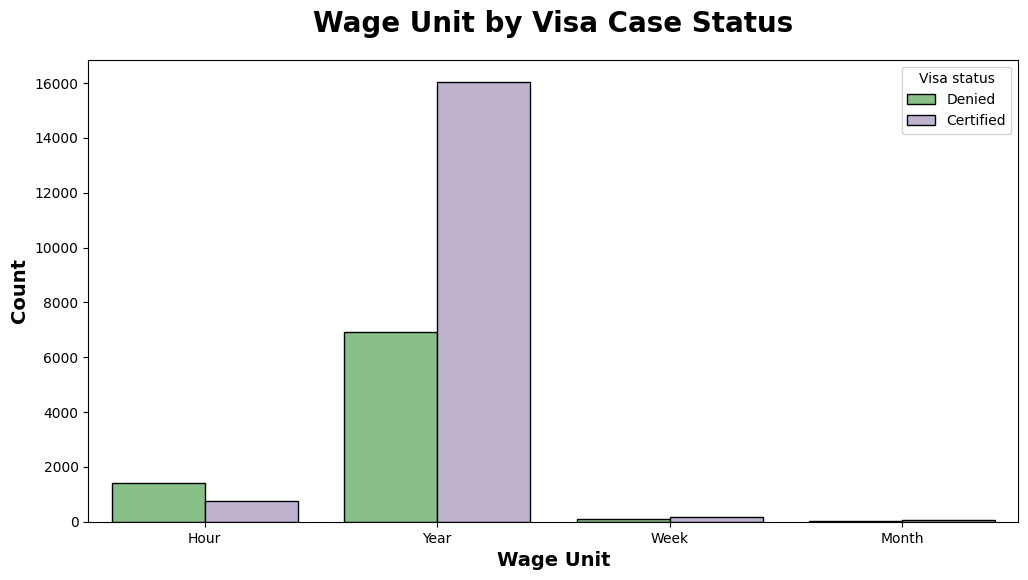

In [55]:
plt.subplots(figsize=(12,6))
sns.countplot(data=df2,x='unit_of_wage',hue='case_status',palette='Accent',ec='black')
plt.title('Wage Unit by Visa Case Status',fontsize=20,pad=20,weight='bold')
plt.ylabel('Count',weight='bold',fontsize=14)   
plt.xlabel('Wage Unit',weight='bold',fontsize=14)
plt.legend(title='Visa status',fancybox=True)
plt.show()


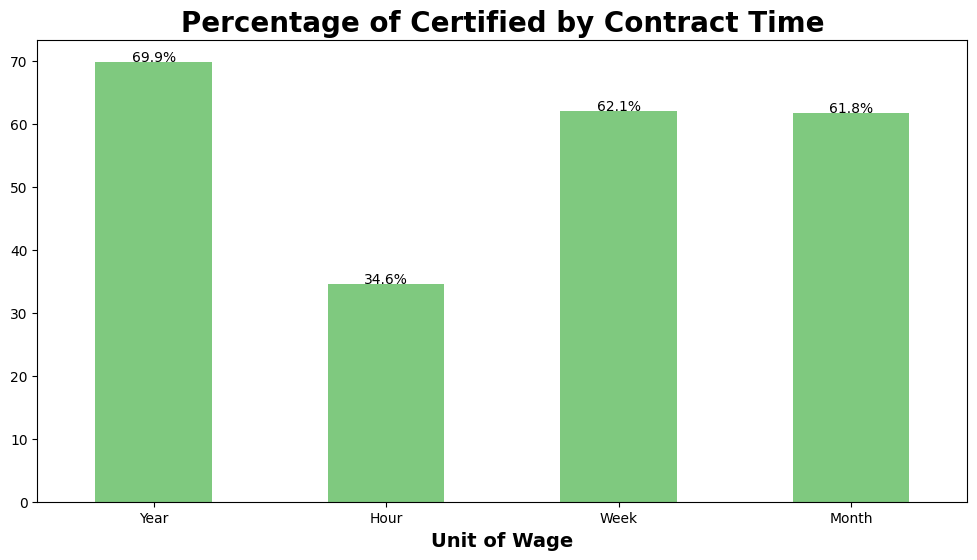

In [65]:
plt.figure(figsize=(12,6))

(100*df2[df2['case_status'].isin(['Certified'])]['unit_of_wage'].value_counts()/df2['unit_of_wage'].value_counts()).plot(kind='bar',stacked=True,colormap='Accent')
plt.title('Percentage of Certified by Contract Time',fontsize=20,fontweight='bold')
order = (100*df2[df2['case_status'].isin(['Certified'])]['unit_of_wage'].value_counts()/df2['unit_of_wage'].value_counts())
for i in range(order.shape[0]):
    count = order[i]
    strt = '{:0.1f}%'.format(count)
    plt.text(i,count+0.1,strt,ha='center')

plt.xlabel('Unit of Wage',fontsize=14,fontweight='bold')
plt.xticks(rotation=0)
plt.show()

#### Insights:
- The yearly contract has high chances of being selected with 69.88 % (approximately ~69.9%) of employee and only 30.1% of employee getting rejected.
- Hour contracts are mostly high chances of being rejected with 65% and 35% of acceptance.
- Moderate chances after yearly contract are weekly and monthly around 62% chances of success and 38% of rejection.

#### 4.7 Does Region of employement has impact on Visa status?

In [71]:
df2.groupby('region_of_employment')['case_status'].value_counts()

region_of_employment  case_status
Island                Certified       226
                      Denied          149
Midwest               Certified      3253
                      Denied         1054
Northeast             Certified      4526
                      Denied         2669
South                 Certified      4913
                      Denied         2104
West                  Certified      4100
                      Denied         2486
Name: count, dtype: int64

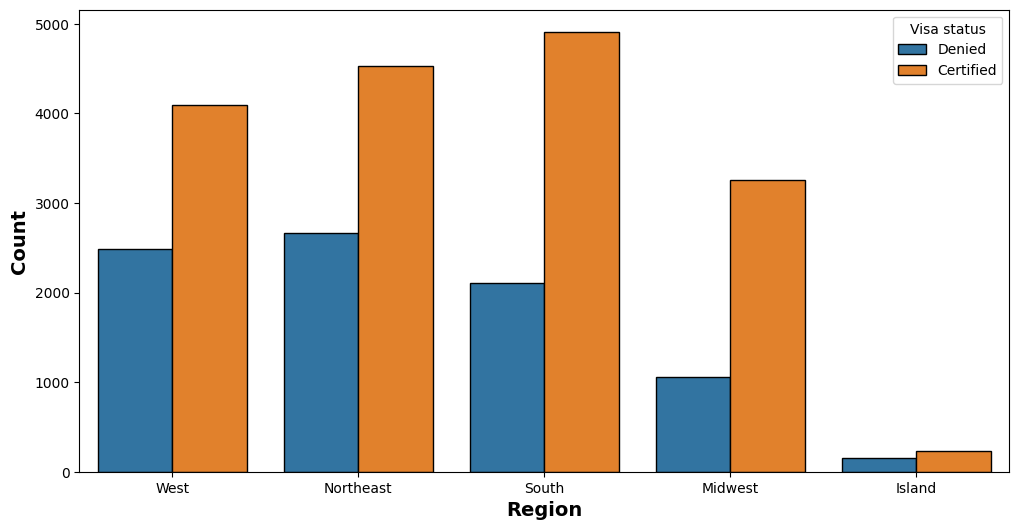

In [ ]:
plt.subplots(figsize=(12,6))
sns.countplot(data=df2,x='region_of_employment',hue='case_status', ec='black')
plt.xlabel('Region',weight='bold',fontsize=14)
plt.ylabel('Count',weight='bold',fontsize=14)
plt.legend(title='Visa status',fancybox=True)
plt.show()

In [73]:
df2[df2['case_status'].isin(['Certified'])]['region_of_employment'].value_counts()

region_of_employment
South        4913
Northeast    4526
West         4100
Midwest      3253
Island        226
Name: count, dtype: int64

In [74]:
df['region_of_employment'].value_counts()

region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dtype: int64

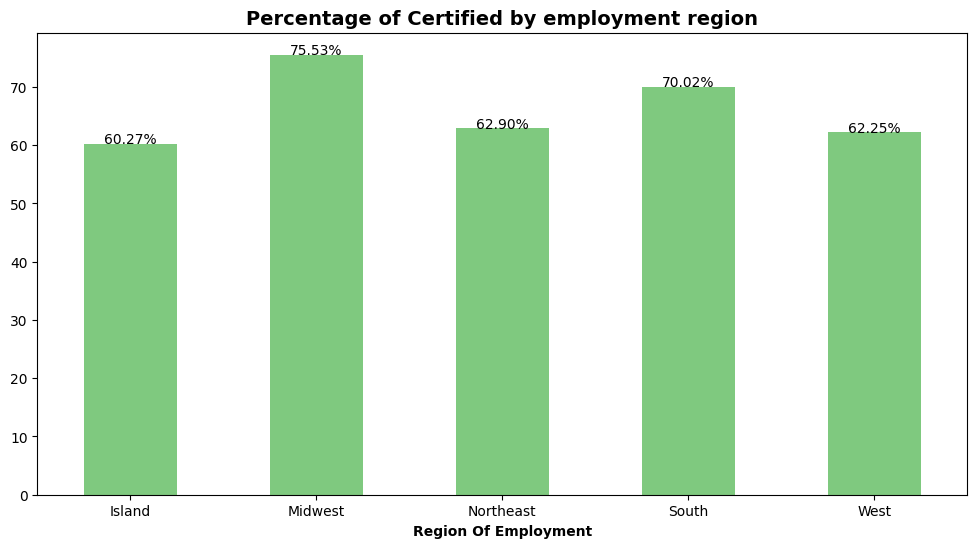

In [78]:
plt.figure(figsize=(12,6))
(100*df2[df2['case_status'].isin(['Certified'])]['region_of_employment'].value_counts()/df['region_of_employment'].value_counts()).plot(kind='bar',stacked=True,colormap='Accent')
plt.title('Percentage of Certified by employment region',fontsize=14,fontweight='bold')
order = (100*df2[df2['case_status'].isin(['Certified'])]['region_of_employment'].value_counts()/df['region_of_employment'].value_counts())
for i in range(order.shape[0]):
    count = order[i]
    strt = "{:.2f}%".format(count)
    plt.text(i,count+0.01,strt,ha='center')

plt.xlabel('Region Of Employment',fontweight='bold')
plt.xticks(rotation=0)
plt.show()

#### Insights:
- Midwest has high chances of getting selected with 75.53% followed by south with 70.02%
- Northeast , West and Island has similiar chances of selection for employment which is 63%,62% and 60%.

#### 4.8 Does Prevailing wage has any impact on Visa status?

**Prevailing wage is continuous variable**

In [89]:
df2.groupby('prevailing_wage')['case_status'].value_counts()

prevailing_wage  case_status
2.1367           Certified      1
2.9561           Denied         1
3.0031           Denied         1
3.3188           Denied         1
3.4889           Certified      1
                               ..
311734.4900      Certified      1
314156.0600      Certified      1
315497.6000      Certified      1
318446.0500      Certified      1
319210.2700      Denied         1
Name: count, Length: 25462, dtype: int64

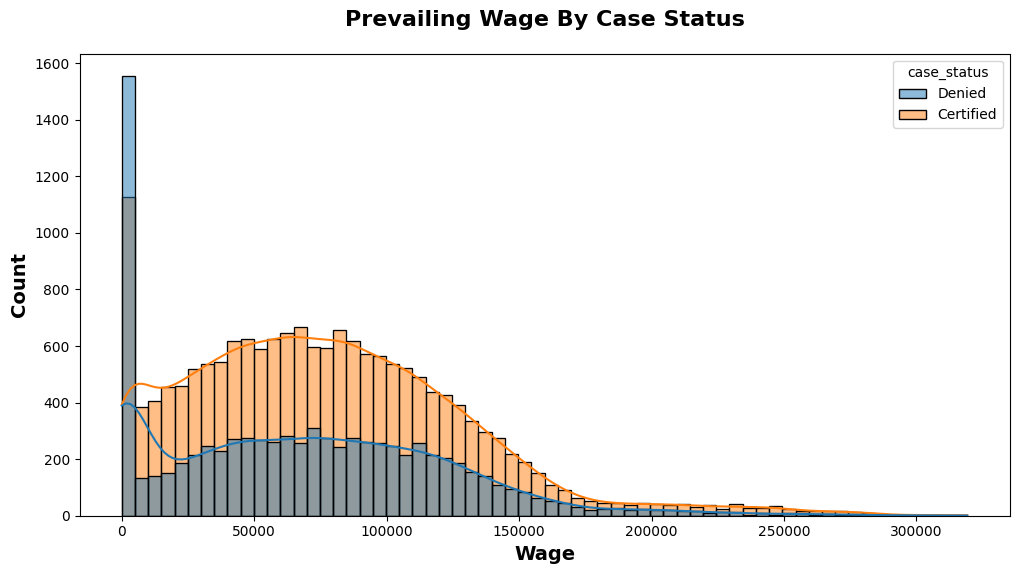

In [91]:
plt.figure(figsize=(12,6))
sns.histplot(data=df2,x='prevailing_wage',hue='case_status',kde=True)
plt.title('Prevailing Wage By Case Status',weight='bold',fontsize=16,pad=20)
plt.xlabel('Wage',fontsize=14,fontweight='bold')
plt.ylabel('Count',fontsize=14,fontweight='bold')
plt.show()

- The Certified cases (orange) dominate the middle-to-high wage ranges, especially between $60,000 and $120,000.
- As wage increases, the proportion of Certified cases increases.
- This suggests that higher offered wages may positively influence visa certification outcomes.
- The Denied cases (blue) are heavily concentrated at the very low end of the wage scale, particularly below $20,000.
 - There's also a noticeable spike at $0–$10,000, which could imply:
    -   Data quality issues (e.g., missing or incorrectly entered wages).
    -   Applications not following proper wage rules. 
- This indicates a strong negative correlation between extremely low wages and visa approval.
- The highest volume of Certified cases lies in the $50k–$100k range.
- This could represent standard industry wages for technical or skilled positions (e.g., IT, engineering, etc.).
- While some high-wage applications exist (up to $300k+), they’re relatively rare.
Certification rates remain strong, but the volume drops off — likely due to fewer jobs in those high-paying brackets.
- There’s a massive spike for Denied cases around $0–$10k — far below prevailing wage norms.
    - This indicates either:
    - Invalid applications.
    - Poorly filled data.
    - Outiler data

**Here the both distribution curve has outliers that need to be handled**
The wage is based on multiple factors but here in dataset there are 3 columns which can tell the infromation about wage.


















#### 4.8.1 Prevailing wage based on Education

In [121]:
print("Mean Prevailing Wage By Education Of Employee")
df2.groupby('education_of_employee')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage',ascending=False)

Mean Prevailing Wage By Education Of Employee


,prevailing_wage
education_of_employee,
Master's,78843.057843
Bachelor's,73405.443735
High School,71582.147756
Doctorate,64561.076657


In [120]:
print("Median Prevailing Wage By Education Of Employee")
df2.groupby('education_of_employee')['prevailing_wage'].median().to_frame().sort_values(by='prevailing_wage',ascending=False)

Median Prevailing Wage By Education Of Employee


,prevailing_wage
education_of_employee,
Master's,75020.590
Bachelor's,69825.710
High School,66204.710
Doctorate,57543.625


In [129]:
print(f"Median Prevailing Wage of High School and Master's candidate more than Doctorate in Percentage: \n High School to Doctorate:{((66204.710-57543.625)/57543.625*100):.2f} \n Master's to Doctorate:{((75020.590-57543.625)/57543.625*100):.2f}")

Median Prevailing Wage of High School and Master's candidate more than Doctorate in Percentage: 
 High School to Doctorate:15.05 
 Master's to Doctorate:30.37


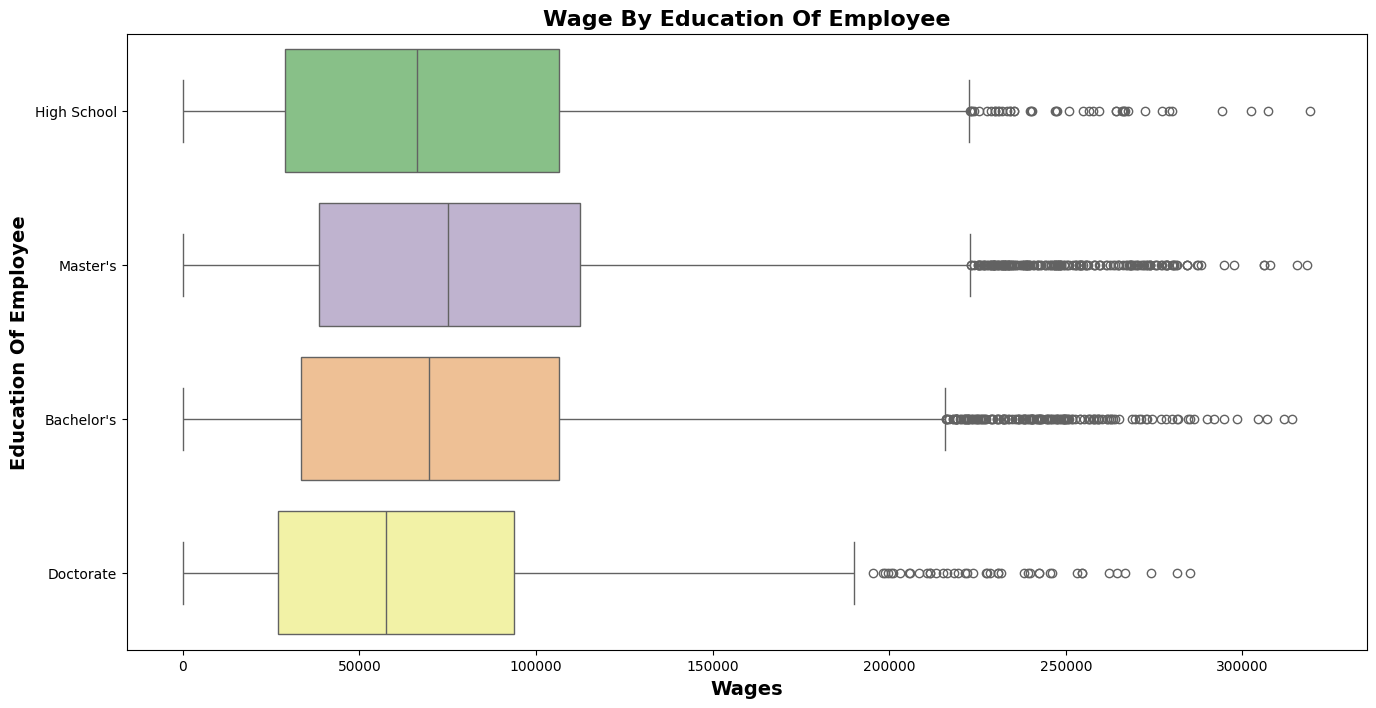

In [111]:
plt.subplots(figsize=(16,8))
sns.boxplot(data=df2,x='prevailing_wage',y='education_of_employee',palette='Accent')
plt.title('Wage By Education Of Employee',weight='bold',fontsize=16)
plt.xlabel("Wages",fontsize=14,weight='bold')
plt.ylabel("Education Of Employee",fontsize=14,weight='bold')
plt.show()

#### Insights:
- As we can see that masters degree candidates are more paid that doctorate candidate.
- Median wage of masters is high also compared to other degrees with 75K and average wage of 78.8K which higher probability of been certified for foreign jobs.
- whiskers of masters is also wide and median to. suprising insight we can see high school candidates are paid more than doctorate.
- Master's and high school employee are paid more than doctorate by 30.37% and 15.05%. 

### 4.8.2 Prevailing Wage Based on Job Experience

In [119]:
print("Median Prevailing Wage Based on Job Experience")
df.groupby('has_job_experience')['prevailing_wage'].median().to_frame().sort_values(by='prevailing_wage',ascending=False)

Median Prevailing Wage Based on Job Experience


,prevailing_wage
has_job_experience,
N,72602.290
Y,69033.665


#### Report:
- Employee which has no job experience are more previling wage.
- 72K USD are wage paid for Non Job Experience Employee.
- 69K USD are wage paid for Job Experience Employee.

#### 4.8.3 Prevailing Wage Based on Continent

In [133]:
print("Average Prevailing Wage Based on Continent")
df2.groupby('continent')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage',ascending=False)

Average Prevailing Wage Based on Continent


,prevailing_wage
continent,
Asia,79543.021780
Africa,77425.923450
Oceania,75994.276719
North America,68066.319257
South America,60209.575314
Europe,59842.925899


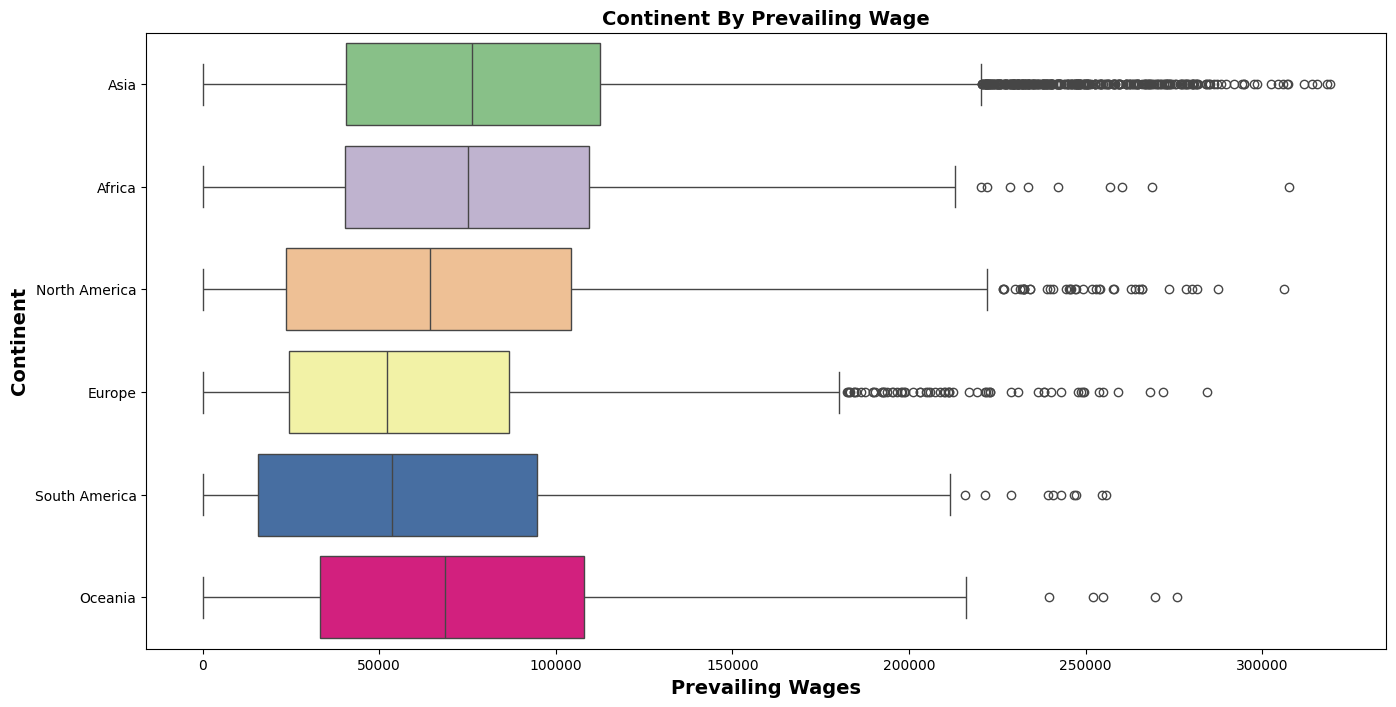

In [135]:
plt.subplots(figsize=(16,8))
sns.boxplot(data=df2,x='prevailing_wage',y='continent',palette='Accent')
plt.title('Continent By Prevailing Wage',fontsize=14,weight='bold')
plt.xlabel('Prevailing Wages',fontsize=14,weight='bold')
plt.ylabel('Continent',fontsize=14,weight='bold')
plt.show()

#### Report:
- Average salary of people from Asia is higher than other continents.

#### 4.9 Year of Establishment

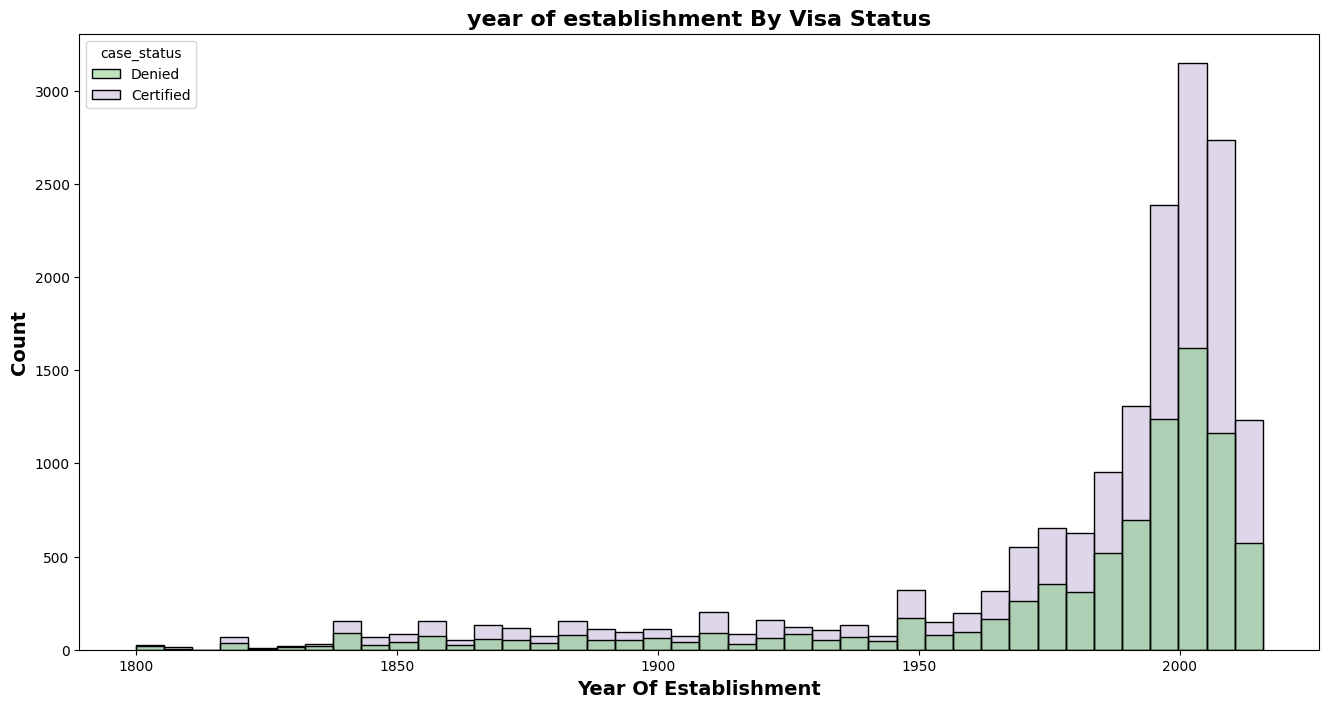

In [143]:
plt.subplots(figsize=(16,8))
sns.histplot(data=df2,x='yr_of_estab',palette='Accent',bins=40,hue='case_status')
plt.title('year of establishment By Visa Status',weight='bold',fontsize=16)
plt.xlabel('Year Of Establishment',weight='bold',fontsize=14)
plt.ylabel('Count',weight='bold',fontsize=14)
plt.show()

#### Report:
- Each bins consistes of 5 Years.
- After 1950 many companies started were established monotonically and mostly at 2000 dotcom boom peak.
- 2000 to 2005 year most company established.

#### Final Report:
- case id column can be dropped as it an ID.
- required_job_training column can be dropped as it doesnot have much impact on target variable.Proved by chi2 test.
- no_of_employees , prevailing_wage columns have outlier which should be handled.
- Continent columns have few unique values with very less count which can be made as Others.
- Target column case_status is imabalanced can be handled before model building.

In [144]:
########################-------------Feature Engineering and Model Training in Next ipynb------------###########################